Question 2: (i)

In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [449]:
train = pd.read_csv("./A2Data_train.csv",header=None)
train = np.array(train)

In [450]:
train.shape

(10000, 101)

In [451]:
X = train[:,:100].T
y = train[:,100]
X.shape, y.shape

((100, 10000), (10000,))

In [452]:
whist = []
w = np.ones((100,))
for i in range(100): # take lambda as 0.1
    whist.append(w)
    grad = np.dot(X, np.dot(X.T, w)) - np.dot(X,y) + 0.1*w
    w = w - 0.000001*grad

In [453]:
wtrue = np.dot(np.linalg.inv(np.dot(X,X.T)+0.1*np.eye(X.shape[0])),np.dot(X,y))

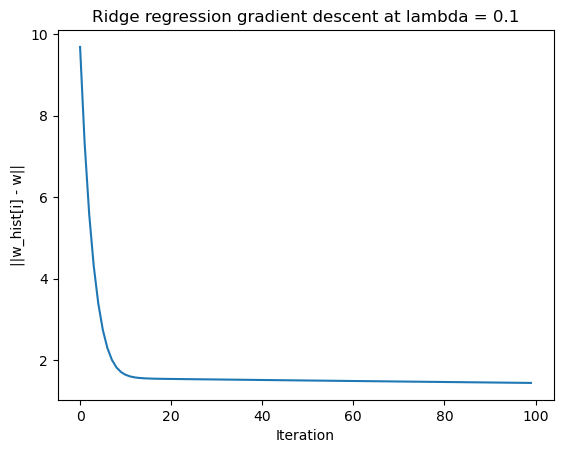

In [454]:
arr = [np.linalg.norm(whist[i]-wtrue) for i in range(len(whist))]
plt.plot(arr)
plt.title("Ridge regression gradient descent at lambda = 0.1")
plt.xlabel('Iteration')
plt.ylabel('||w_hist[i] - w||')
plt.show()

In [455]:
np.linalg.norm(whist[-1] - wtrue)

1.4437237240194059

In [456]:
# How does wtrue behave on the test dataset?
test = np.array(pd.read_csv("A2Data_test.csv",header=None))
Xtest = test[:,:100].T
ytest = test[:,100]
Xtest.shape, ytest.shape

((100, 500), (500,))

In [457]:
testerr = np.linalg.norm(np.dot(Xtest.T,wtrue)-ytest)**2/500
testerr

0.37068490482025923

In [458]:
trainerr = np.linalg.norm(np.dot(X.T,wtrue)-y)**2/10000
trainerr

0.03968644484384218

Q2 (ii)

Now, we will do the same iterative procedure multiple times for multiple values of lambda, and get different final values of w after these. This final value is used to test the validation set and the mean squared error must be stored into an array. We do this for multiple values of lambda and the lambda that gives us least mse on the validation set is the best one.

In [441]:
def splitK(k):
    n = train.shape[0]
    indices = np.arange(n)
    np.random.shuffle(indices)
    fold_size = n // k
    splits = []

    for i in range(k):
        start, end = i * fold_size, (i + 1) * fold_size
        val_indices = indices[start:end]
        train_indices = np.concatenate((indices[:start], indices[end:]), axis=0)
        X_train, y_train = train[train_indices,:100].T, train[train_indices,100]
        X_val, y_val = train[val_indices,:100].T, train[val_indices,100]
        splits.append(((X_train, y_train), (X_val, y_val)))
    
    return splits

In [442]:
mse_arr = []
for l in range(10):
    splits = splitK(8)
    print(len(splits))
    
    mse_splits = []
    for split in splits:
        X,y = split[0]
        Xval, yval = split[1]

        whist = []
        w = np.ones((100,)) 
        for i in range(100):
            whist.append(w)
            grad = np.dot(X, np.dot(X.T, w)) - np.dot(X,y) + 0.01*l*w
            w = w - 0.000001*grad
        print("Converged at w for lambda = ", l*0.01)

        wtrue = np.dot(np.linalg.inv(np.dot(X,X.T)+0.005*l*np.eye(X.shape[0])),np.dot(X,y))
        print("Final error in w: ",np.linalg.norm(whist[-1]-wtrue))

        val_mse = ((np.dot(Xval.T, w) - yval)**2).mean(axis=0)
        print("Val error: ",val_mse)
        mse_splits.append(val_mse)
    
    
    mse_arr.append(np.mean(mse_splits))


8
Converged at w for lambda =  0.0
Final error in w:  1.4641878432069955
Val error:  0.2126420584879471
Converged at w for lambda =  0.0
Final error in w:  1.4571594721326253
Val error:  0.21735995908858732
Converged at w for lambda =  0.0
Final error in w:  1.4547957104942852
Val error:  0.2196452760309583
Converged at w for lambda =  0.0
Final error in w:  1.4601618418483233
Val error:  0.20328132662213355
Converged at w for lambda =  0.0
Final error in w:  1.455147624035598
Val error:  0.21775044810975383
Converged at w for lambda =  0.0
Final error in w:  1.4596703721325746
Val error:  0.22462618005475532
Converged at w for lambda =  0.0
Final error in w:  1.4624241308795973
Val error:  0.213942082406595
Converged at w for lambda =  0.0
Final error in w:  1.4590976217866407
Val error:  0.20993846081243928
8
Converged at w for lambda =  0.01
Final error in w:  1.4568078792020143
Val error:  0.2128639761344605
Converged at w for lambda =  0.01
Final error in w:  1.454378332084087
Val

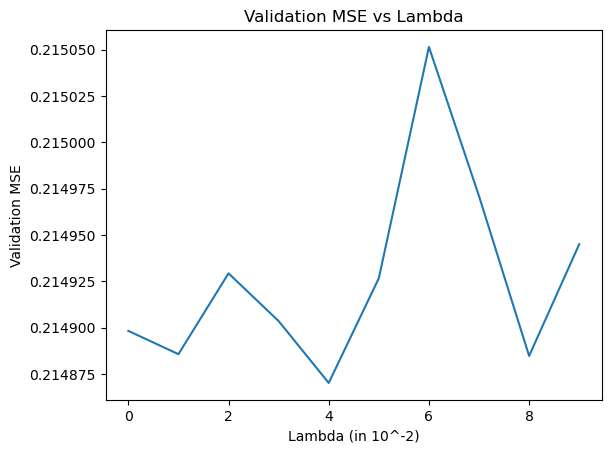

In [443]:
plt.plot(mse_arr)
plt.title("Validation MSE vs Lambda")
plt.xlabel('Lambda (in 10^-2)')
plt.ylabel('Validation MSE')
plt.show()

In [444]:
mse_arr

[0.2148982239516462,
 0.21488566257473335,
 0.21492926917205774,
 0.21490352085881725,
 0.21487015329406195,
 0.21492663673238843,
 0.21505141318552143,
 0.21497091120523493,
 0.2148847002800911,
 0.21494497926673356]

In [445]:
min(mse_arr),np.argmin(mse_arr)

(0.21487015329406195, 4)

In [446]:
test = np.array(pd.read_csv("A2Data_test.csv",header=None))
Xtest = test[:,:100].T
ytest = test[:,100]
Xtest, ytest

(array([[0.21302 , 0.32563 , 0.49539 , ..., 0.24582 , 0.31768 , 0.46955 ],
        [0.44621 , 0.70399 , 0.62357 , ..., 0.32062 , 0.93775 , 0.3374  ],
        [0.51432 , 0.3197  , 0.58121 , ..., 0.79933 , 0.91269 , 0.58504 ],
        ...,
        [0.90491 , 0.42134 , 0.46741 , ..., 0.44786 , 0.099705, 0.20049 ],
        [0.91718 , 0.90906 , 0.67303 , ..., 0.78741 , 0.82134 , 0.68189 ],
        [0.68321 , 0.61539 , 0.60459 , ..., 0.11548 , 0.71902 , 0.49566 ]]),
 array([2.0121 , 1.8164 , 1.6435 , 2.7451 , 1.8932 , 2.4248 , 2.1083 ,
        2.5188 , 1.7084 , 1.9287 , 3.3358 , 1.9751 , 1.6655 , 2.3721 ,
        2.1269 , 2.3718 , 1.7935 , 2.1989 , 2.0102 , 1.6361 , 2.2609 ,
        1.9935 , 2.8229 , 2.2451 , 2.3813 , 2.6078 , 2.2134 , 2.3708 ,
        2.5058 , 2.8999 , 1.9289 , 1.7465 , 2.155  , 2.5551 , 2.038  ,
        1.7588 , 2.42   , 1.236  , 1.6152 , 1.7666 , 2.3065 , 2.7461 ,
        2.4213 , 2.5514 , 2.3282 , 1.6925 , 2.5922 , 2.0712 , 2.4507 ,
        3.0613 , 1.9076 , 2.3518 , 1.9

In [447]:
#Optimum Lambda

l = 0.04
X = train[:,:100].T
y = train[:,100]

wR = np.dot(np.linalg.inv(np.dot(X,X.T)+l*np.eye(X.shape[0])),np.dot(X,y))

testerr = ((np.dot(Xtest.T,wR)-ytest)**2).mean(axis=0)
testerr

0.3707103466753794

In [448]:
wML = np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,y))
testerr = ((np.dot(Xtest.T,wML)-ytest)**2).mean(axis=0)
testerr

0.37072731116978985